In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime,timedelta
from itertools import chain
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
recent_date = (engine.execute('select date from measurement order by date desc').first())[0]
recent_date

'2017-08-23'

2016-08-23


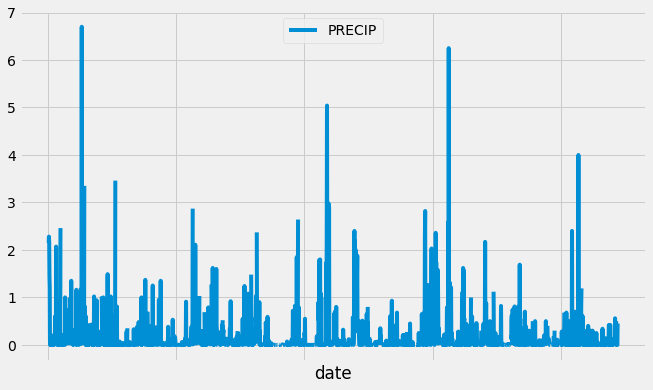

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
last_year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
last_year_prcp
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year, month, day = map(int, recent_date.split("-"))
year_ago = datetime(year, month, day) - timedelta(days=365)
print(year_ago.strftime("%Y-%m-%d"))

# Perform a query to retrieve the data and precipitation scores
date = [row[0] for row in last_year_prcp]
precipitation =  [row[1] for row in last_year_prcp]
#date
#precipitation
# Save the query results as a Pandas DataFrame and set the index to the date column
date_precip_df = pd.DataFrame({'DATE' : date,
                               'PRECIP' : precipitation}).set_index('DATE')
date_precip_df


# Sort the dataframe by date
date_precip_df = date_precip_df.sort_values('DATE')
date_precip_df.head()

# Use Pandas Plotting with Matplotlib to plot the data

date_precip_df.plot(figsize = (10,6))
plt.xlabel("date")
plt.tick_params(
    axis='x',          
    which='both',      # both major and minor ticks are affected
    labelbottom=False) # remove x ticks label
plt.legend(loc = 'upper center')
plt.show()


In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_precip_df.describe()

,PRECIP
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.name)).all()

[(9,)]

In [35]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
engine.execute('select station, count(station) as count from measurement group by station order by count desc').fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
engine.execute('select min(tobs), max(tobs), avg(tobs) from measurement where station = "USC00519281"').fetchall()

[(54.0, 85.0, 71.66378066378067)]

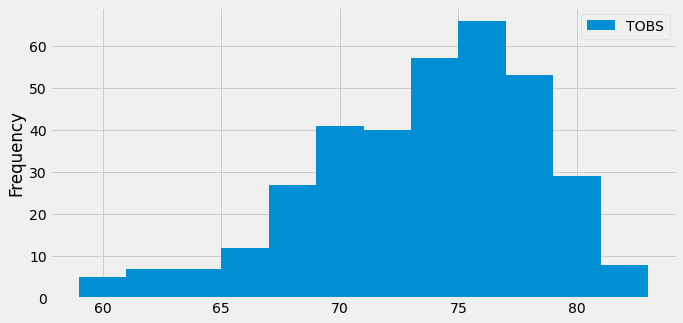

In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = engine.execute('select tobs from Measurement where date >= "2016-08-23" and station = "USC00519281"').fetchall()
data = [row[0] for row in data]
hist_data = pd.DataFrame({'TOBS': data})

hist = hist_data.hist(bins = 12, figsize = (10,5))
plt.ylabel("Frequency")
plt.title("")
plt.legend(["TOBS"])

# Close session

In [47]:
# Close Session
session.close()